In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [58]:
data=pd.read_csv("50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [59]:
#EDA and Visualization
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [60]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [61]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [62]:
data.shape

(50, 5)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [64]:
len(data)

50

In [65]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [66]:
data.duplicated().sum()

0

In [67]:
 data.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [68]:
data = data.drop('State', axis = 1)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [69]:
#change column name
df=data.rename({'R&D Spend':'RD','Administration':'Admin','Marketing Spend':'Marketing'},axis=1)
df.head()

,RD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RD,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Admin,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


<AxesSubplot:>

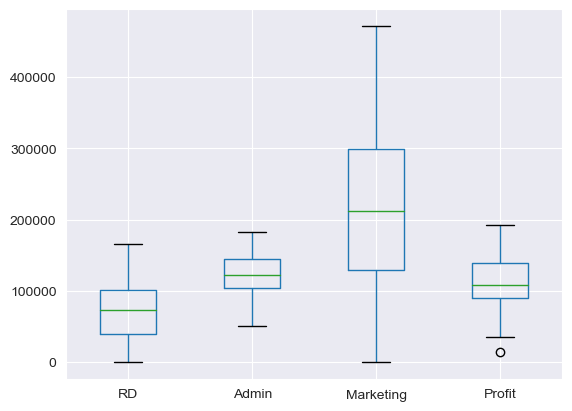

In [71]:
df.boxplot()

In [72]:
#Correlation Analysis
df.corr()

,RD,Admin,Marketing,Profit
RD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


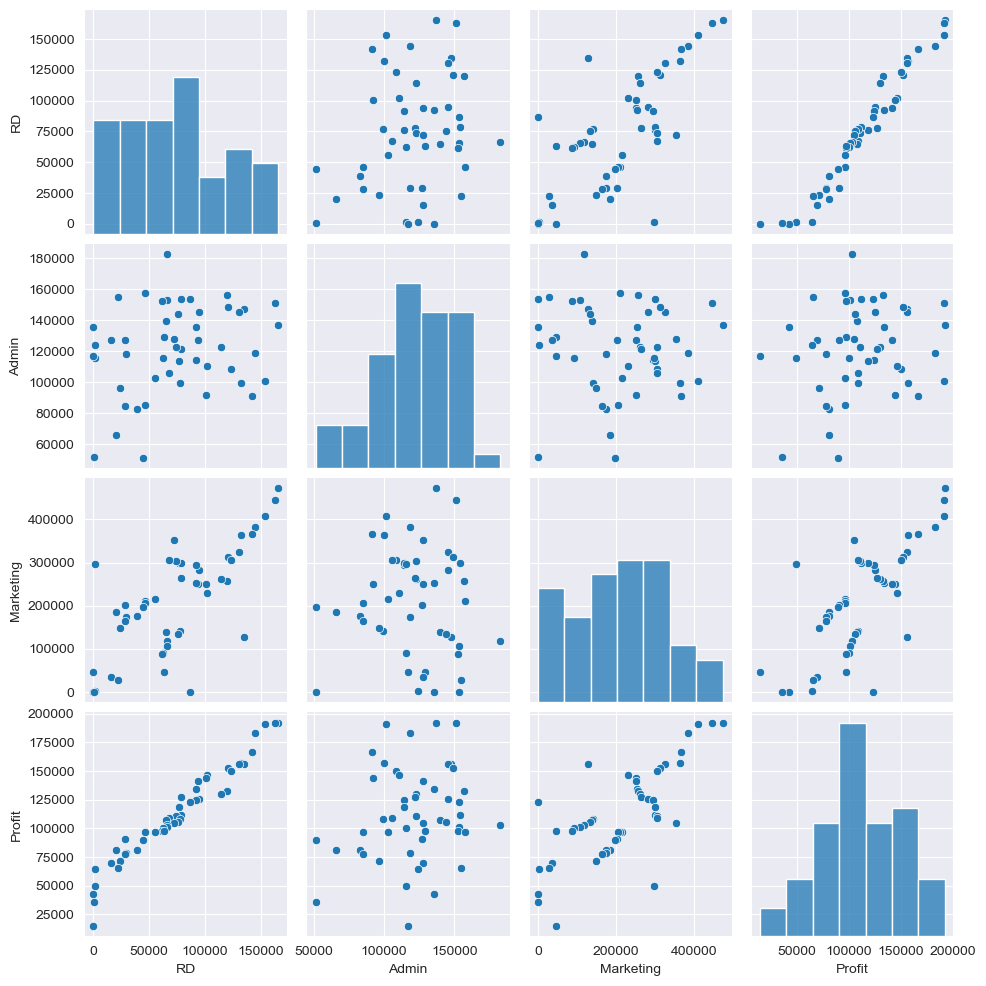

In [73]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

<AxesSubplot:xlabel='Profit', ylabel='Marketing'>

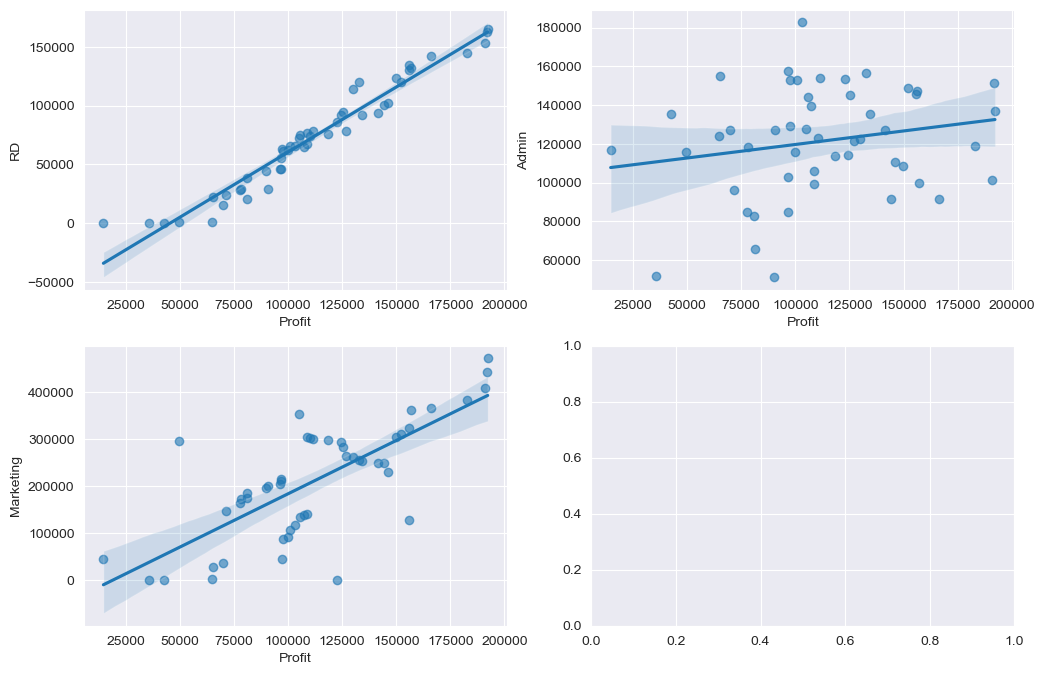

In [74]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sns.regplot(x = 'Profit', y = 'RD', data = df, scatter_kws={'alpha':0.6}, ax = axes[0,0])
sns.regplot(x = 'Profit', y = 'Admin', data = df, scatter_kws={'alpha':0.6}, ax = axes[0,1])
sns.regplot(x = 'Profit', y = 'Marketing', data = df, scatter_kws={'alpha':0.6}, ax = axes[1,0])


<AxesSubplot:>

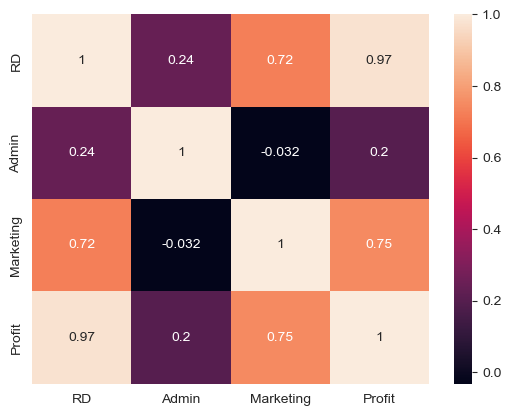

In [75]:
sns.heatmap(df.corr(),annot=True)

In [76]:
#import statsmodel
import statsmodels.formula.api as smf

In [77]:
model=smf.ols('Profit~RD+Admin+Marketing',data=df).fit()

In [78]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        16:03:16   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
print(f"t value is\n{model.tvalues}\nP value is\n{model.pvalues}\n")
print(f"rsquared= {model.rsquared},\nAdj.rsquared= {model.rsquared_adj}")  

t value is
Intercept     7.626218
RD           17.846374
Admin        -0.525507
Marketing     1.655077
dtype: float64
P value is
Intercept    1.057379e-09
RD           2.634968e-22
Admin        6.017551e-01
Marketing    1.047168e-01
dtype: float64

rsquared= 0.9507459940683246,
Adj.rsquared= 0.9475337762901719


In [80]:
df.columns

Index(['RD', 'Admin', 'Marketing', 'Profit'], dtype='object')

In [81]:
#Admin and Marketing p value greater than alpha(0.05)

In [82]:
model_Admin=smf.ols('Profit~Admin',data=df).fit()
model_Admin.tvalues,model_Admin.pvalues

(Intercept    3.040044
 Admin        1.419493
 dtype: float64,
 Intercept    0.003824
 Admin        0.162217
 dtype: float64)

In [83]:
model_Marketing=smf.ols('Profit~Marketing',data=df).fit()
model_Marketing.tvalues,model_Marketing.pvalues

(Intercept    7.808356
 Marketing    7.802657
 dtype: float64,
 Intercept    4.294735e-10
 Marketing    4.381073e-10
 dtype: float64)

In [84]:
model_Admin_Marketing=smf.ols('Profit~Admin+Marketing',data=df).fit()
model_Admin_Marketing.tvalues,np.round(model_Admin_Marketing.pvalues,5)

(Intercept    1.142741
 Admin        2.467779
 Marketing    8.281039
 dtype: float64,
 Intercept    0.25893
 Admin        0.01729
 Marketing    0.00000
 dtype: float64)

# Model Validation
## Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [85]:
# 1] Check for multicolinearity
# VIF: Variance inflation Factor
r=smf.ols('RD~Admin+Marketing',data=df).fit().rsquared
vif_RD=1/(1-r)

a=smf.ols('Admin~RD+Marketing',data=df).fit().rsquared
vif_Admin=1/(1-a)

m=smf.ols('Marketing~RD+Admin',data=df).fit().rsquared
vif_Marketing=1/(1-m)

print(vif_RD,vif_Admin,vif_Marketing)

VIFData={'Variables':['RD','Admin','Marketing'],'vif':[vif_RD,vif_Admin,vif_Marketing]}
dfVIF=pd.DataFrame(VIFData)
dfVIF

2.468903069994701 1.175091007055045 2.3267732905308773


,Variables,vif
0,RD,2.468903
1,Admin,1.175091
2,Marketing,2.326773


In [86]:
# None variable has VIF>20  >>>>  No Collinearity  >>>> so consider all varaibles in Regression equation

In [87]:
# 2] Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
import statsmodels.api as sm

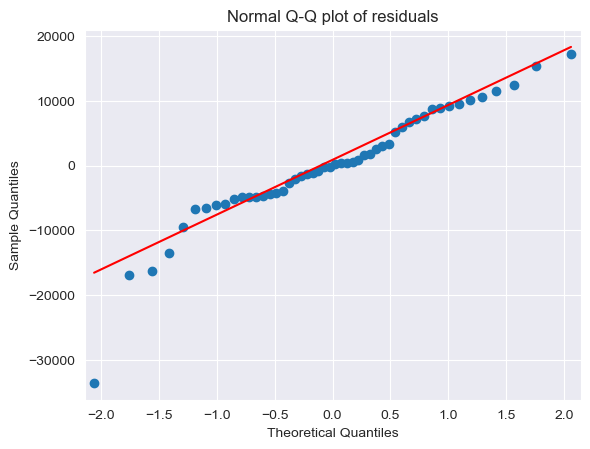

In [88]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [89]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [90]:
# Check for Homoscedasticity or Heteroscedasticity(model's standardized fitted values vs standardized residual values)
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()      # User defined z = (x - mu)/sigma

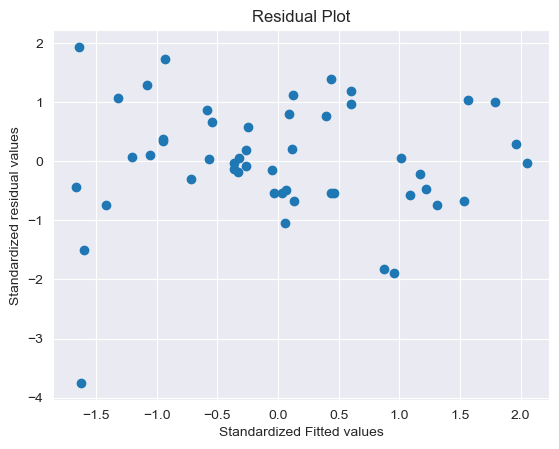

In [91]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# *Residual Vs Regressors*


eval_env: 1


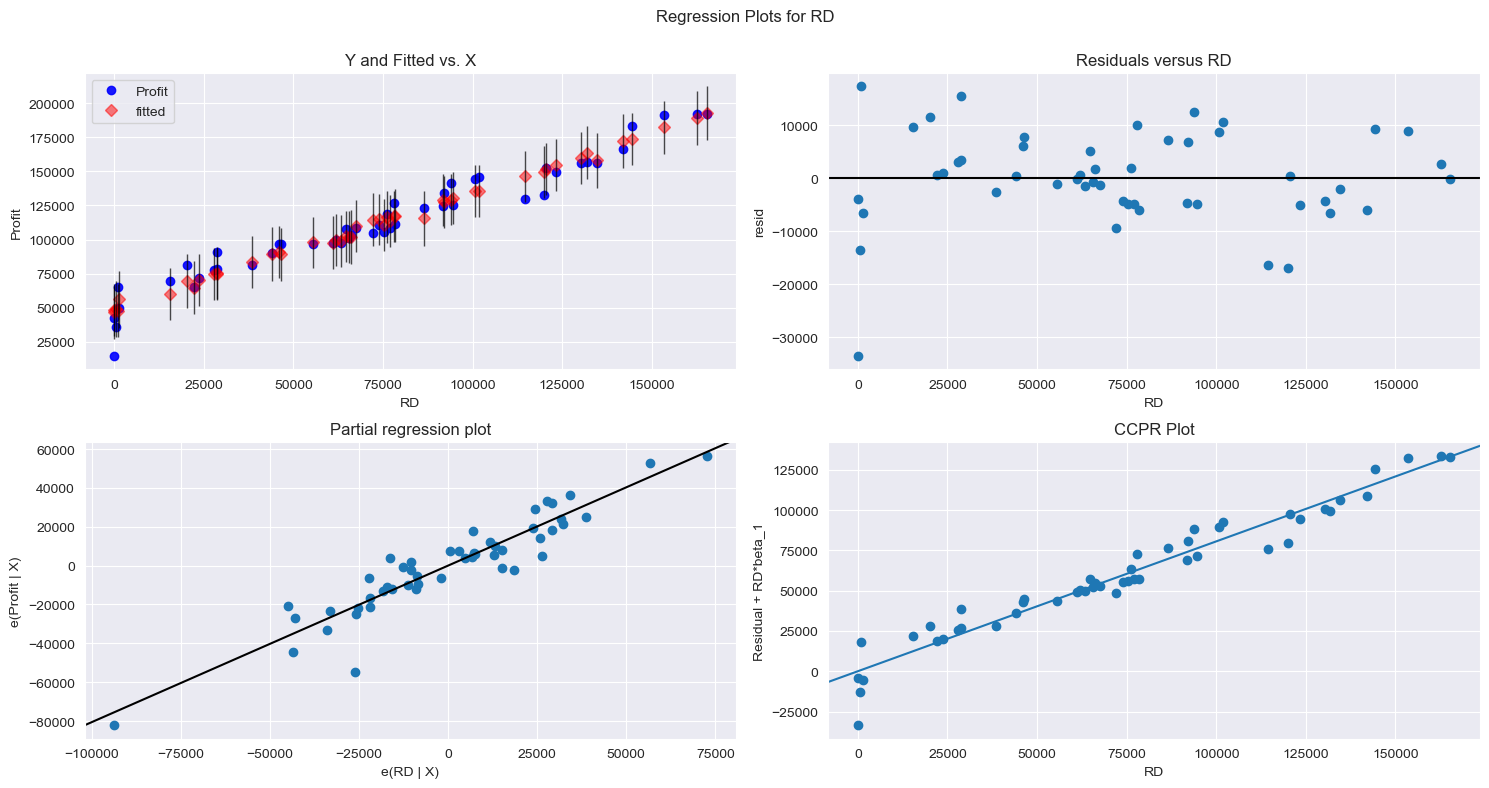

In [92]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)      # exog = x-variable & endog = y-variable   
plt.show()

eval_env: 1


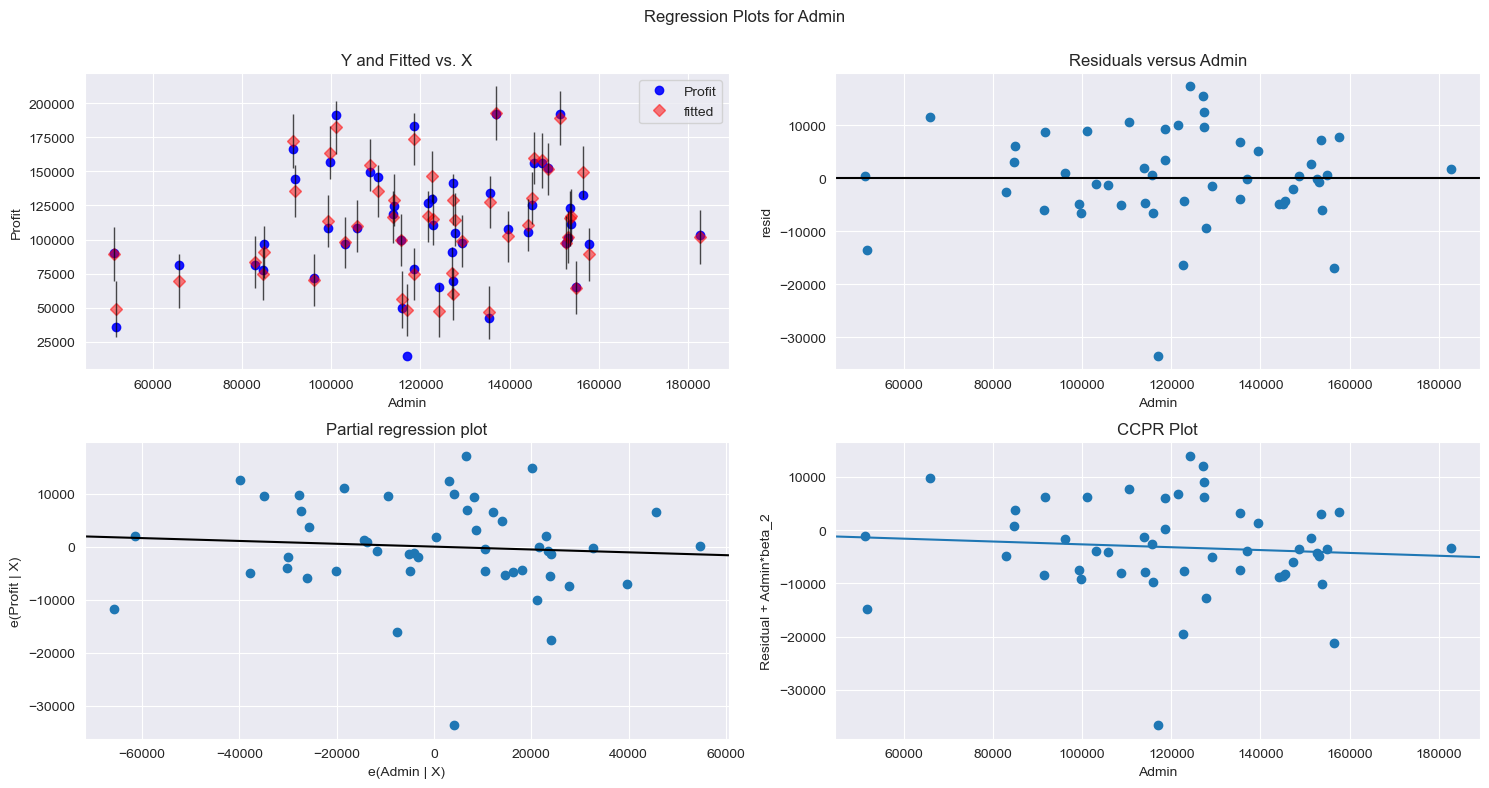

In [93]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Admin", fig=fig)
plt.show()

eval_env: 1


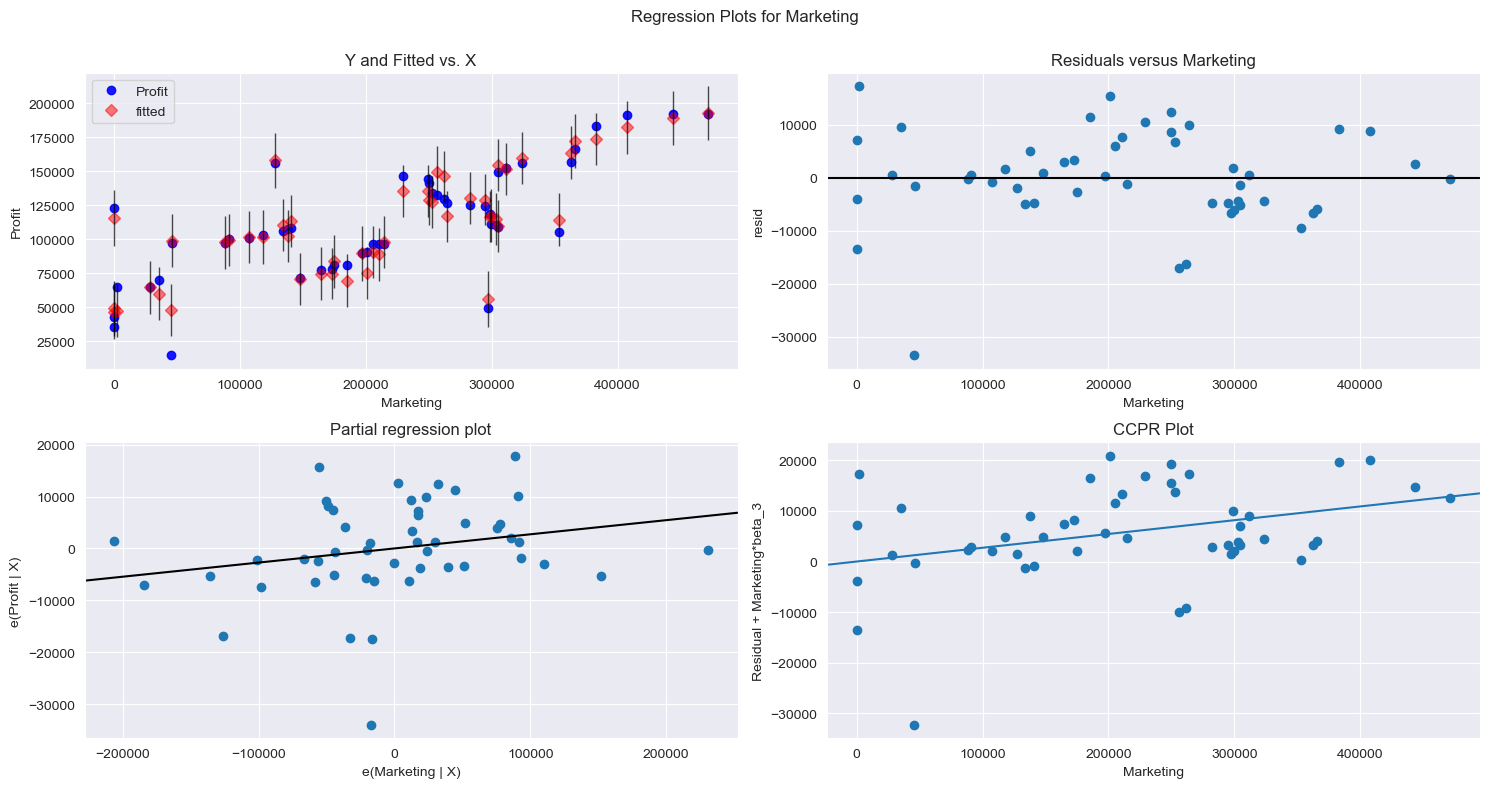

In [94]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing", fig=fig)
plt.show()

## Model Deletion Diagnostics (checking Outliers or Influencers)
### Two Techniques : 1. Cook's Distance & 2. Leverage value

In [95]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

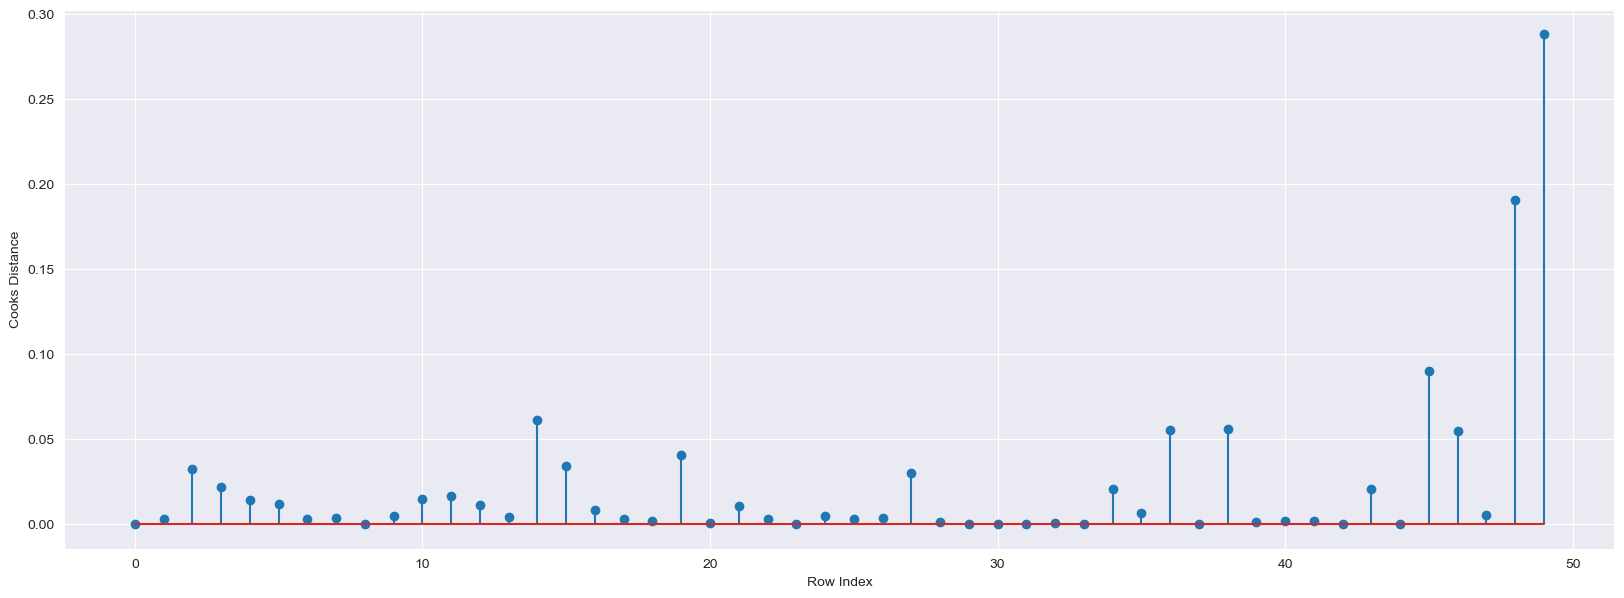

In [96]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [97]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543267)

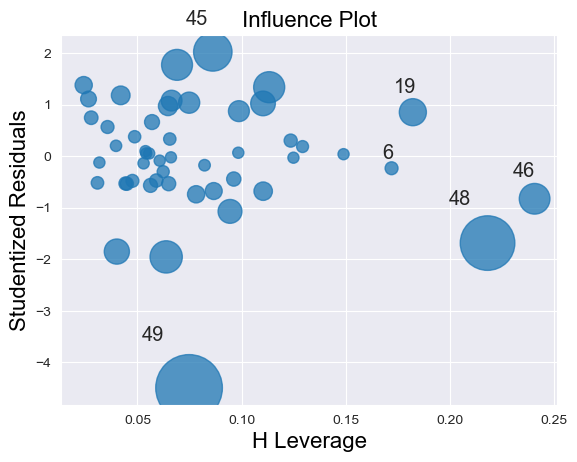

In [98]:
# Influence Plot(Points beyond Leverage_cutoff value are influencers)
influence_plot(model)
plt.show()

In [99]:
# Leverage Cuttoff Value = 3*(k+1)/n 
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = (3*(k+1))/n  # k = no.of features/columns & n = no. of datapoints
leverage_cutoff

0.3

In [100]:
df[df.index.isin([49])]

,RD,Admin,Marketing,Profit
49,0.0,116983.8,45173.06,14681.4


In [101]:
# delete the data point which are influencer and reassign the row no.
df1=df.drop(df.index[[49]],axis=0).reset_index(drop=True)

In [102]:
df1

,RD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [103]:
Final_model= smf.ols('Profit~RD+Admin+Marketing',data = df1).fit()

In [104]:
Final_model.rsquared # R_squared value increased >>>Use for Prediction

0.9613162435129847

In [105]:
model.rsquared

0.9507459940683246

In [111]:
d2={'Models':['Model','Final_model'],'Rsquared':[model.rsquared,Final_model.rsquared]}
tbl=pd.DataFrame(d2)
tbl

,Models,Rsquared
0,Model,0.950746
1,Final_model,0.961316


# *Prediction*

In [109]:
new=pd.DataFrame({'RD':75000,"Admin":132300,"Marketing":240700},index=[0])
new

,RD,Admin,Marketing
0,75000,132300,240700


In [107]:
Final_model.predict(new)

1    114244.072342
dtype: float64

In [110]:
# Automatic Prediction of Price with 90.02% accurcy
pred_Price=Final_model.predict(df1)
pred_Price

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64